# Imports + Set working directory

In [1]:
from pathlib import Path
import os
from monsoonbench.visualization import (
    output_heatmap,
    output_reliability_diagram,
)

# 1. Find the project root dynamically
# This looks at the current file and goes up until it finds 'pyproject.toml'
current_file_path = Path(os.getcwd())
repo_root = next((p for p in current_file_path.parents if (p / "pyproject.toml").exists()), current_file_path.parent.parent.parent)

# 2. Define absolute paths based on that root
data_dir = repo_root / "data"
output_dir = repo_root / "examples/demo_notebooks/outputs"

# 3. Ensure output directory exists so the code doesn't crash later
output_dir.mkdir(parents=True, exist_ok=True)
print(current_file_path)
print(f"Project Root: {repo_root}")
print(f"Data Directory: {data_dir}")
print(f"Output Directory: {output_dir}")

/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks
Project Root: /Users/christinetsai/winter2026/aice/monsoon-bench
Data Directory: /Users/christinetsai/winter2026/aice/monsoon-bench/data
Output Directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs


# Figures 2a, 2b for models IFS, GenCast, FuXi-S2S, NGCM
### 2a and 2b. Brier Skill Score and AUC heatmaps
### 30 day forecasts + period 2019 - 2024

# IFS-S2S Model
- Run without year 2024 
- Results from 50 ensemble members
    - 40.4, 15.6, 6.7, 6.9, 0, 1.4 (first two values are slightly off paper)
     0.92, 0.86, 0.79, 0.78, 0.7, 0.72 (all AUC values are exactly the same as paper)
- Results from 11 ensemble members
    - same as 50

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ifs
Years: [2019, 2020, 2021, 2022, 2023]
Max forecast day: 30
Day bins: [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021, 2022, 2023]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 26 init times x 10 unique locations x 11 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), np.float64(20.0)

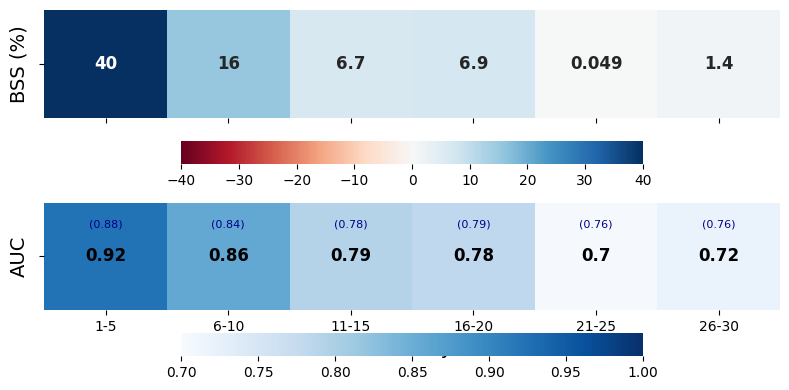

Figure saved as '/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs/skill_scores_heatmap_ifs_30day.png'


In [2]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/IFS-S2S/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 11,              # Number of ensemble members to use
    'model_name': 'ifs',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019, 2020, 2021, 2022, 2023],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 30,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_heatmap(args)

## Gencast Model
- 50 ensemble members
    - 37.1, 10.5, 9.1,-0.9, -4.4, -2.0 (all values are off by less than 0.5 points)
    - AUC values are exactly the same
- 51 ensemble members
    - only first two values are slightly off

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: gencast
Years: [2019, 2020, 2021, 2022, 2023, 2024]
Max forecast day: 30
Day bins: [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021, 2022, 2023, 2024]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 26 init times x 10 unique locations x 51 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), 

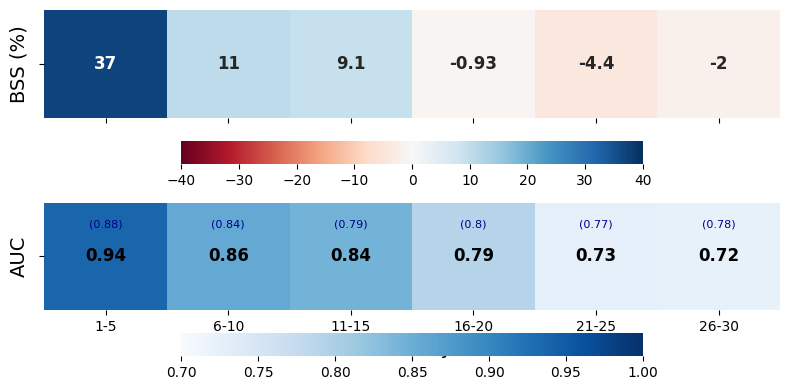

Figure saved as '/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs/skill_scores_heatmap_gencast_30day.png'


In [4]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/gencast52/tp_lsm_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'gencast',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019, 2020, 2021, 2022, 2023, 2024],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 30,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_heatmap(args)

# Fuxi S2S Model
- Missing years 2022-2024, run with years 2019-2021
- 51 ensemble members
    - all values are off

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: fuxi-s2s
Years: [2019, 2020, 2021]
Max forecast day: 30
Day bins: [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 13 init times x 10 unique locations x 51 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), np.float64(20.0)), (np.float64(84.0

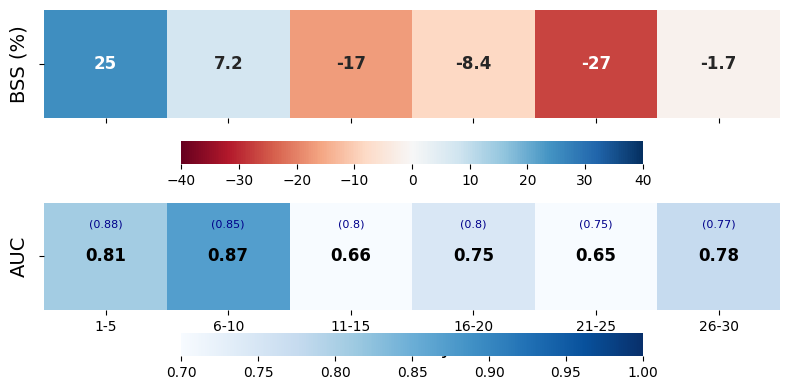

Figure saved as '/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs/skill_scores_heatmap_fuxi-s2s_30day.png'


In [7]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/fuxi_s2s/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'fuxi-s2s',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019, 2020, 2021],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 30,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_heatmap(args)

# NGCM Model (Climatology)
- 50 ensemble members
    - all Brier scores are slightly off (by 0.5 or less)
    - all AUC scores are exactly the same

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ngcm
Years: [2019, 2020, 2021, 2022, 2023, 2024]
Max forecast day: 30
Day bins: [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021, 2022, 2023, 2024]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 26 init times x 10 unique locations x 50 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), np.

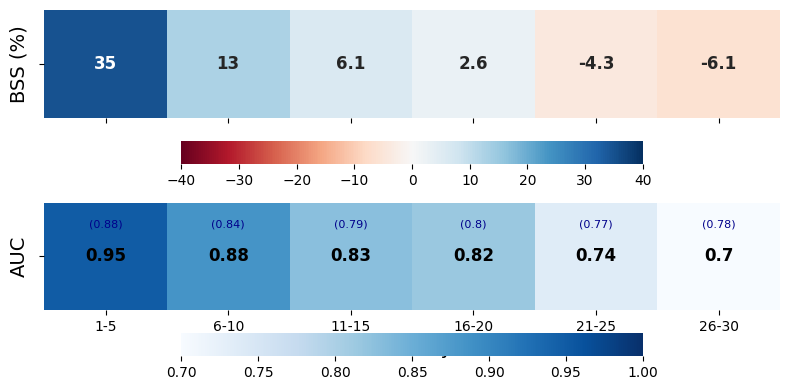

Figure saved as '/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs/skill_scores_heatmap_ngcm_30day.png'


In [8]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/ngcm51/climatology/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 50,              # Number of ensemble members to use
    'model_name': 'ngcm',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019, 2020, 2021, 2022, 2023, 2024],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 30,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_heatmap(args)

# Figures 5a, 5b for models IFS, FuXi-S2S, NGCM
### 5a and 5b. Brier Skill Score and AUC heatmaps
### 30 day forecasts + period 2004 - 2024

# IFS Model

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ifs
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Max forecast day: 30
Day bins: [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Using 4-degree CMZ polygon coordinates

Processing year 2004
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2004.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2004-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all

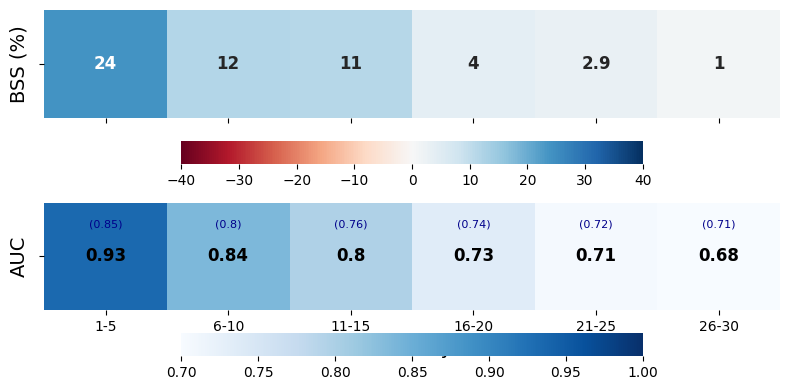

Figure saved as '/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs/skill_scores_heatmap_ifs_30day.png'


In [12]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/IFS-S2S/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 11,              # Number of ensemble members to use
    'model_name': 'ifs',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
              2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
              2020, 2021, 2022, 2023],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 30,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_heatmap(args)

# Fuxi-S2S Model
- Missing years 2022-2024, run with years 2004-2021

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: fuxi-s2s
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Max forecast day: 30
Day bins: [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Using 4-degree CMZ polygon coordinates

Processing year 2004
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2004.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2004-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members..

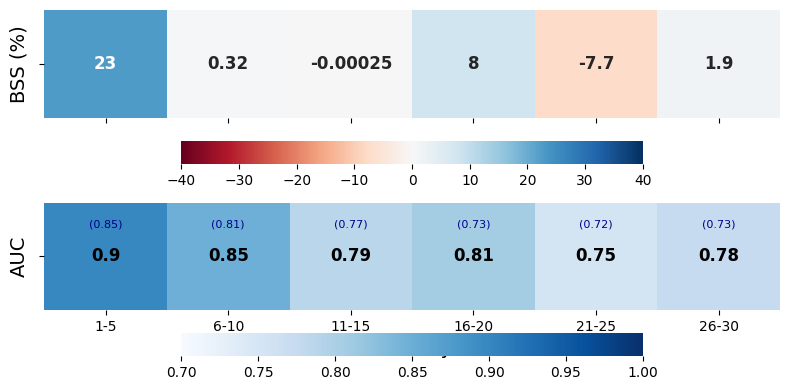

Figure saved as '/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs/skill_scores_heatmap_fuxi-s2s_30day.png'


In [13]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/fuxi_s2s/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'fuxi-s2s',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
              2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
              2020, 2021],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 30,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_heatmap(args)

# NGCM Model (Climatology)

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ngcm
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Max forecast day: 30
Day bins: [(1, 5), (6, 10), (11, 15), (16, 20), (21, 25), (26, 30)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Using 4-degree CMZ polygon coordinates

Processing year 2004
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2004.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2004-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing 

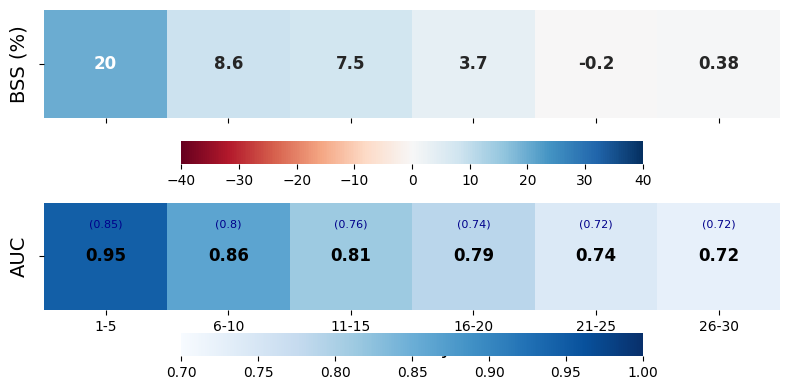

Figure saved as '/Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs/skill_scores_heatmap_ngcm_30day.png'


In [14]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/ngcm51/climatology/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'ngcm',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021, 2022, 2023, 2024],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 30,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_heatmap(args)

# Figure 2e - Reliability Diagrams - Models IFS, FuXi-S2S, NGCM
### 1-15 day forecast, period 2019 - 2024


# IFS Model

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ifs
Years: [2019, 2020, 2021, 2022, 2023]
Max forecast day: 15
Day bins: [(1, 5), (6, 10), (11, 15)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021, 2022, 2023]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 26 init times x 10 unique locations x 11 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), np.float64(20.0)), (np.float64(84.0), np.float

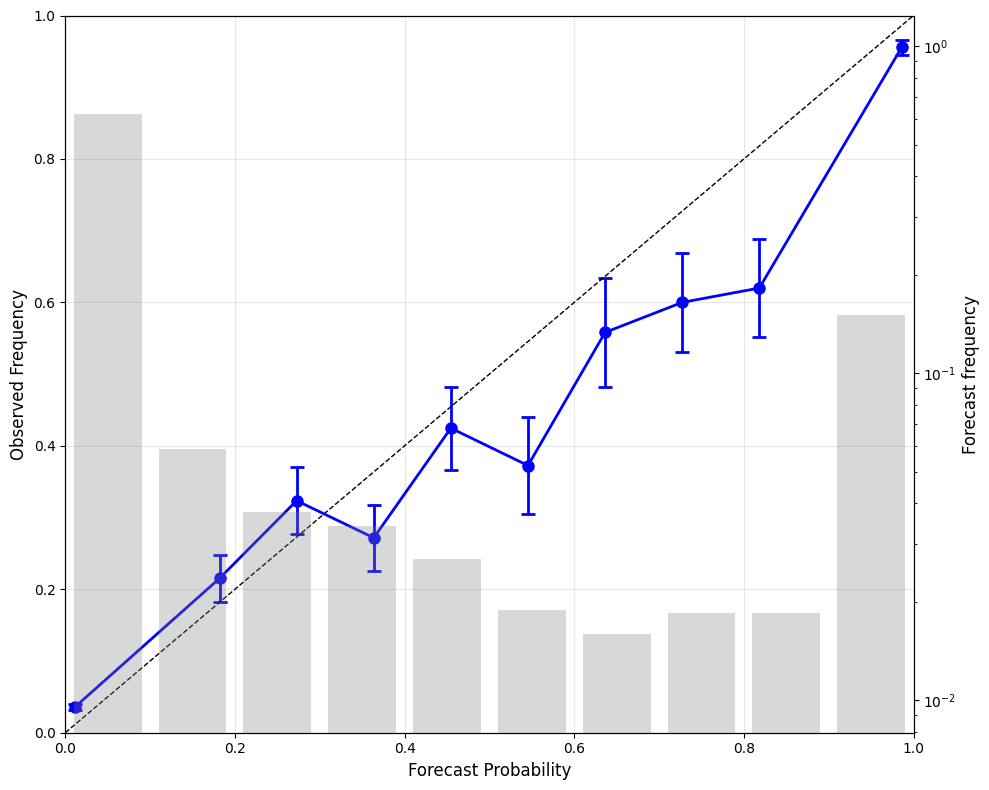

Reliability results saved to: path


In [12]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/IFS-S2S/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 11,              # Number of ensemble members to use
    'model_name': 'ifs',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019, 2020, 2021, 2022, 2023],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 15,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_reliability_diagram(args)

# GenCast Model

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: gencast
Years: [2019, 2020, 2021, 2022, 2023, 2024]
Max forecast day: 15
Day bins: [(1, 5), (6, 10), (11, 15)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021, 2022, 2023, 2024]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 26 init times x 10 unique locations x 51 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), np.float64(20.0)), (np.float64

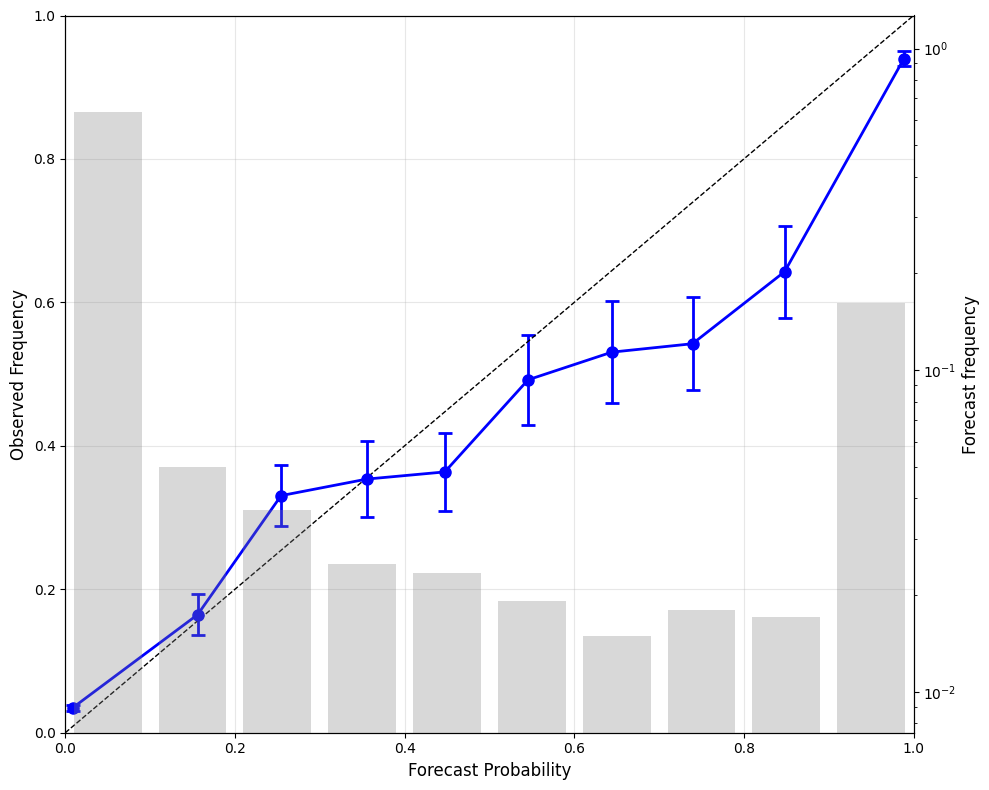

Reliability results saved to: path


In [8]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/gencast52/tp_lsm_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'gencast',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019, 2020, 2021, 2022, 2023, 2024],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 15,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_reliability_diagram(args)

# FuXi-S2S Model

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: fuxi-s2s
Years: [2019, 2020, 2021]
Max forecast day: 15
Day bins: [(1, 5), (6, 10), (11, 15)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 13 init times x 10 unique locations x 51 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), np.float64(20.0)), (np.float64(84.0), np.float64(20.0)), (np.floa

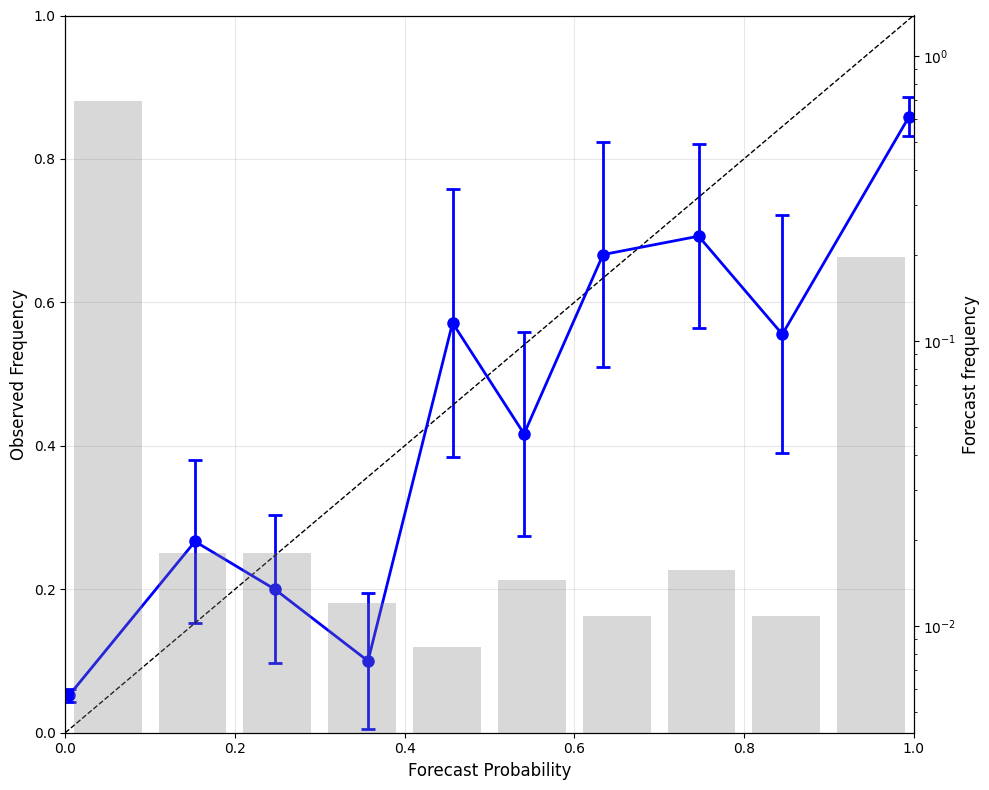

Reliability results saved to: path


In [3]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/fuxi_s2s/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'fuxi-s2s',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019,
              2020, 2021],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 15,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_reliability_diagram(args)

# NGCM Model (Climatology)

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ngcm
Years: [2019, 2020, 2021, 2022, 2023, 2024]
Max forecast day: 15
Day bins: [(1, 5), (6, 10), (11, 15)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2019, 2020, 2021, 2022, 2023, 2024]
Using 4-degree CMZ polygon coordinates

Processing year 2019
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2019.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2019-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 26 init times x 10 unique locations x 51 members...
Unique lat-lon pairs: [(np.float64(76.0), np.float64(20.0)), (np.float64(80.0), np.float64(20.0)), (np.float64(84

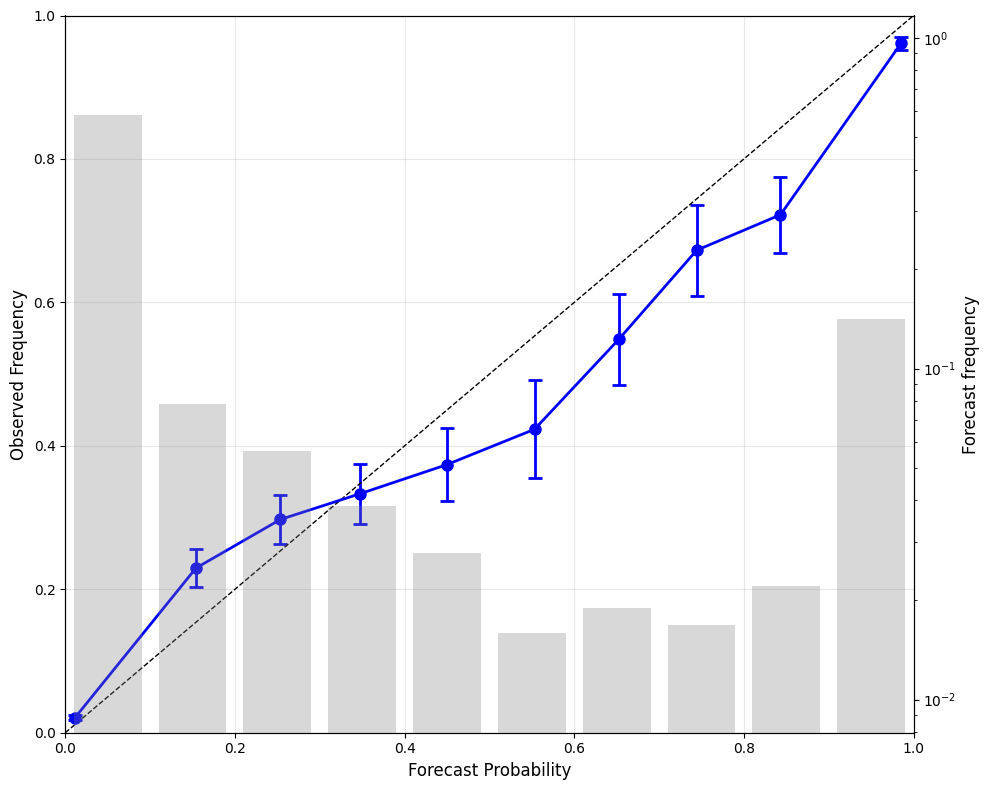

Reliability results saved to: path


In [5]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/ngcm51/climatology/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'ngcm',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2019, 2020, 2021, 2022, 2023, 2024],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 15,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_reliability_diagram(args)

# Figure 5e - Reliability Diagrams - Models IFS, FuXi-S2S, NGCM
### 1-15 day forecast, period 2004 - 2021

# IFS Model

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ifs
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Max forecast day: 15
Day bins: [(1, 5), (6, 10), (11, 15)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Using 4-degree CMZ polygon coordinates

Processing year 2004
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2004.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2004-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processin

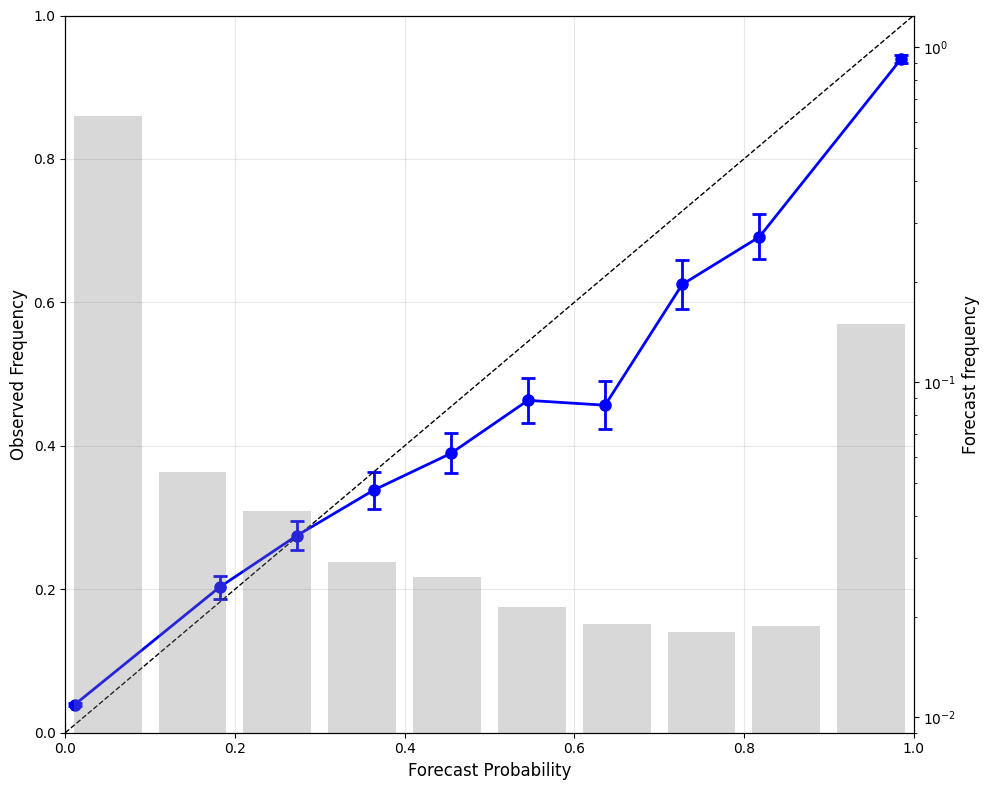

Reliability results saved to: path


In [ ]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/IFS-S2S/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 11,              # Number of ensemble members to use
    'model_name': 'ifs',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
              2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
              2020, 2021],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 15,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_reliability_diagram(args)

# Fuxi-S2S Model

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: fuxi-s2s
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Max forecast day: 15
Day bins: [(1, 5), (6, 10), (11, 15)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Using 4-degree CMZ polygon coordinates

Processing year 2004
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2004.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2004-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members...
Processing 13 init times x 1

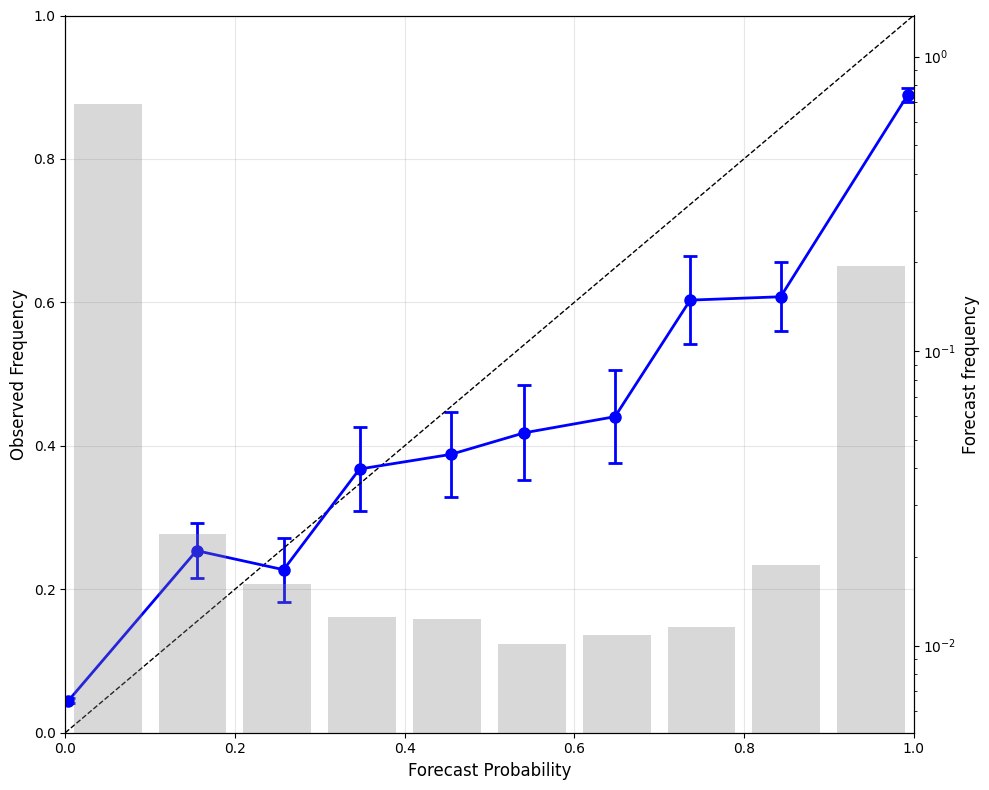

Reliability results saved to: path


In [9]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/fuxi_s2s/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'fuxi-s2s',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
              2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
              2020, 2021],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 15,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_reliability_diagram(args)

# NGCM Model (Climatology)

S2S MONSOON ONSET SKILL SCORE ANALYSIS
Model: ngcm
Years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Max forecast day: 15
Day bins: [(1, 5), (6, 10), (11, 15)]
MOK filter: True (June 2nd)
Output directory: /Users/christinetsai/winter2026/aice/monsoon-bench/examples/demo_notebooks/outputs

1. Processing forecast model...
Processing years: [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Using 4-degree CMZ polygon coordinates

Processing year 2004
Loading S2S model data...
Loading IMD rainfall data...
Loading IMD rainfall from: /Users/christinetsai/winter2026/aice/monsoon-bench/data/imd_rainfall_data/4p0/2004.nc
Renamed dimensions: {'TIME': 'time'}
Detecting observed onset...
Using MOK date (June 2nd) (2004-06-02) as start date for onset detection
Found onset in 100 out of 100 grid points
Computing onset for all ensemble members

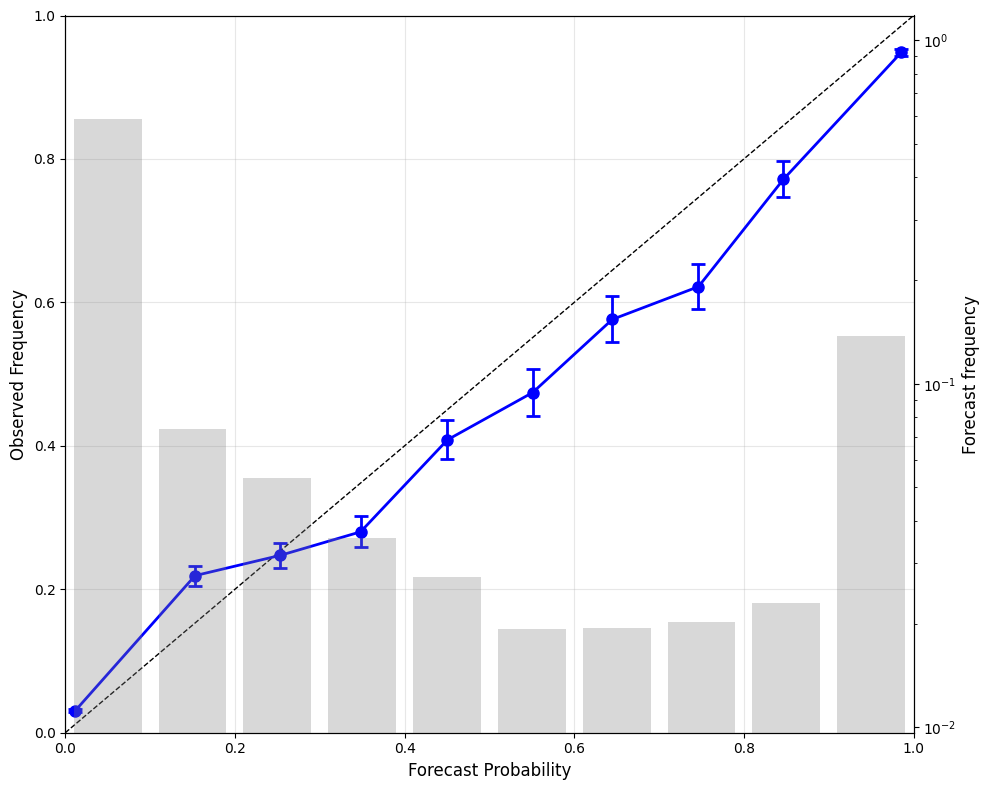

Reliability results saved to: path


In [10]:
args = {
    # Required arguments - fill in with your paths
    'model_forecast_dir': f'{data_dir}/model_forecast_data/ngcm51/climatology/tp_4p0',  # Directory containing S2S model data
    'imd_folder': f'{data_dir}/imd_rainfall_data/4p0',          # Directory containing IMD rainfall data
    'thres_file': f'{data_dir}/imd_onset_threshold/mwset4x4.nc4',          # Path to threshold NetCDF file
    'mem_num': 51,              # Number of ensemble members to use
    'model_name': 'ngcm',         # Model name for output files (e.g., 'gencast', 'fuxi')
    
    # Optional arguments with defaults
    'years': [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021, 2022, 2023, 2024],  # Years to process
    'date_filter_year': 2024,   # Year to use for date filtering
    'file_pattern': '{}.nc',    # File pattern for S2S data
    'max_forecast_day': 15,     # Maximum forecast day (15 or 30)
    'save_dir': output_dir,           # Directory to save output CSV and PNG files
    'mok': True,                # Use MOK date filter (June 2nd) for onset detection
}

output_reliability_diagram(args)